Overfitting:
when a model performs very well for training data but has poor performance with test data(new data), it is known as overfitting. in this case, the machine learning model learns the details and noise in the training data such that it negatively affects the performance of the model on the test data. it can happen due to low bias and high variance.

Reasons:

1.  data used for training is not cleaned and contains noise(garbagr values) in it.
2.  model has  a high variance.
3.  size of training dataset used is not enough.
4.  model is too complex.

Underfitting:
when a model has not learned the patterns in the training data well and is unable to generalize well on the new data. it is known as underfitting. An underfit model has poor performance on the training data and will result in unreliable  predicions. underfitting occurs due to high bias and low variance.
reasons:

1. data used for training is not cleaned and contains noise in it.
2. model has high bias
3. size of training dataset used is not enough.
4. model is too simple.

Good fit:

to find the good fit model, you need to look at the peformance of machine learning model over time with the training data. as the algorithm learns overtime, the error for the model on the training data reduces, as well as the error on the test dataset. if you train the model for too long, the model may learn the unnecessary details and the noise in the training set and ence lead to overfitting. in order to achieve a good fit, you need to stop training at a point where the error starts to increase.

BIAS:

it is a prediction error that is introduced in the model due to oversimplifying machine learning algorithms. or it is the difference between the predicted values and actual values.

Variance:

if the machine learning model performs well with the training dataset, but performs well with the test dataset, then variance ocurs.

*  high training score and high testing score= good fit
*  high training score and low testing score == overfit
*  low training score and low testing score== underfit

SVM:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('/content/drive/MyDrive/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isna().any()

,0
age,False
sex,False
cp,False
trtbps,False
chol,False
fbs,False
restecg,False
thalachh,False
exng,False
oldpeak,False


In [6]:
df.dtypes

,0
age,int64
sex,int64
cp,int64
trtbps,int64
chol,int64
fbs,int64
restecg,int64
thalachh,int64
exng,int64
oldpeak,float64


In [7]:
df.shape

(303, 14)

In [8]:
x= df.iloc[:,:-1]
x
y=df.iloc[:,-1]
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [9]:
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.fit_transform(x_test)

In [21]:
from sklearn.svm import SVC
classifier= SVC()
classifier.fit(x_train,y_train)

SVC()

In [22]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [23]:
test_score= classifier.score(x_test,y_test)
test_score

0.8688524590163934

In [24]:
train_score= classifier.score(x_train,y_train)
train_score

0.8925619834710744

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8688524590163934

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[21,  6],
       [ 2, 32]])

<Axes: >

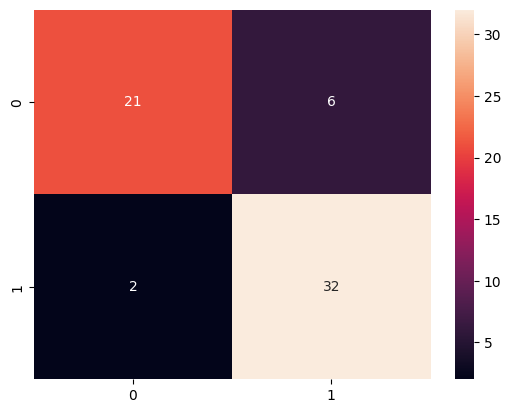

In [27]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)